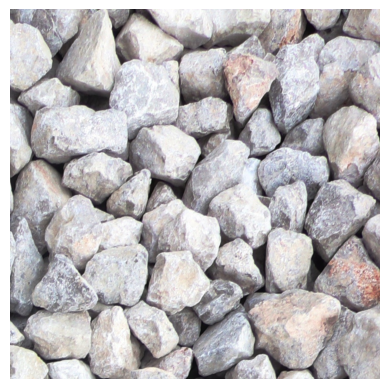

(1000, 1000, 3)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
img = mpimg.imread('rocks.jpg') 
plt.imshow(img) 
plt.axis('off') 
plt.show() 
img.shape

In [4]:
X = np.zeros((img.shape[0], img.shape[1], img.shape[2] + 2))                                    
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        X[i, j, 0 : 3] = img[i, j, 0 : 3]
        X[i, j, 3] = i
        X[i, j, 4] = j
X = X.reshape((X.shape[0] * X.shape[1]), X.shape[2]) 
X.shape


(1000000, 5)

In [5]:
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=30, random_state=42)
X_pred = kmeans.fit_predict(X)
X_centroids = kmeans.cluster_centers_
print(X_pred.shape)


(1000000,)


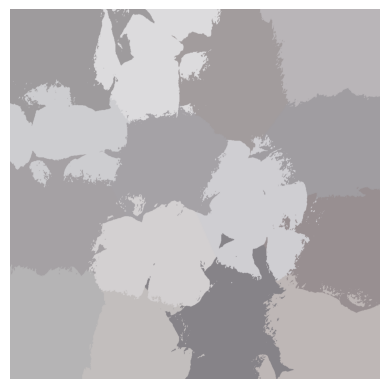

In [6]:

X_pred = X_pred.reshape(img.shape[0], img.shape[1])  
segmented_img = np.zeros_like(img, dtype=np.uint8)  

for i in range(15):
    segmented_img[X_pred == i] = (X_centroids[i, 0:3]).astype(np.uint8) 


plt.imshow(segmented_img)
plt.axis("off")
plt.show()
        